# Quick reply on the feedback of Lab 5

I just realized how *sh\*t* I actually knew about regression before (as @fig-bell-curve shows). I’ll be revising my work next week since I got caught up with multiple deadlines from my advisor[^1].

**I'm dying.**

[^1]: So did you finally have lunch with him?. 

![I think I was here.](./bell-curve.jpg){#fig-bell-curve}

## About the `web doc`

I’ve open-sourced all the labs, including questions and solutions, on my GitHub repository. Unlike PDFs, the web version can be updated at any time — even after it's published. The flexibility of HTML may reflects the evolving way we produce knowledge in academia.

\pagebreak

# Context
An instructor of EDUC8009 noticed that a lot of students became very stressed about this course, so he designed a questionnaire to measure their fear of statistics. Each item was a statement followed by a five-point Likert scale: 

1 = strongly disagree, 2 = disagree, 3 = neither agree nor disagree, 4 = agree, 5 = strongly agree. 

Note that only item 2 is reverse-scored. The data are saved in `fear.sav`.

# Objectives
1. Compute Cronbach’s alpha of all the items but item 2. Is the reliability high?
2. If you can delete an item to improve the scale, which item will you delete? Why?
3. To compute Cronbach’s alpha of all the items, we need recode item 2 first. Describe the distribution of the new variable you just generated.
4. Compute Cronbach’s alpha of all the items in the scale.

# Solutions

## Talk is cheap. Let's face the `fear`. 

In [1]:
import pandas as pd
import pyreadstat

fear_df = pd.read_spss('./datasets/fear.sav', convert_categoricals=False)
fear_questions = pyreadstat.read_sav('./datasets/fear.sav')[1].column_labels

In [2]:
# List all questions asked. 
def list_questions(): 
    n=1
    for question in fear_questions: 
        print(f'Q{n}: {question}')
        n += 1

list_questions()

Q1: Statistics makes me cry
Q2: Standard deviations excite me
Q3: I dream that Pearson is attacking me with correlation coefficients
Q4: I don't understand statistics
Q5: People try to tell you that SPSS makes statistics easier to understand but it doesn't
Q6: I weep openly at the mention of central tendency
Q7: I can't sleep for thoughts of effect sizes
Q8: I wake up under my duvet thinking that I am trapped under a normal distribution


In [3]:

# Shape of the 'fear'
print(f'Rows vs Columns: ', fear_df.shape)

# Columns include in this dataset
print(f'Name of columns: ', fear_df.columns)

# Describe it!
print(f'Description: \n', fear_df.describe())

Rows vs Columns:  (2571, 8)
Name of columns:  Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8'], dtype='object')
Description: 
                 Q1           Q2           Q3           Q4           Q5  \
count  2571.000000  2571.000000  2571.000000  2571.000000  2571.000000   
mean      3.483469     3.481136     3.471023     3.465189     3.494360   
std       0.986297     0.990585     0.994262     1.000707     0.981674   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       3.000000     3.000000     3.000000     3.000000     3.000000   
50%       4.000000     4.000000     3.000000     3.000000     4.000000   
75%       4.000000     4.000000     4.000000     4.000000     4.000000   
max       5.000000     5.000000     5.000000     5.000000     5.000000   

                Q6           Q7           Q8  
count  2571.000000  2571.000000  2571.000000  
mean      3.473357     3.498639     3.475690  
std       0.982913     0.998588     0.978212  
min       1.

Wait, $N = 2571$? The entire FED doesn't even have this many students!

I then plotted the Likert-scale (see @fig-likert) to see the distribution of everyone's fear:

/home/rshen/miniconda3/envs/educ8009/lib/python3.10/site-packages/plot_likert/plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)
/home/rshen/miniconda3/envs/educ8009/lib/python3.10/site-packages/plot_likert/plot_likert.py:310: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  responses_to_first_question = responses_per_question[0]


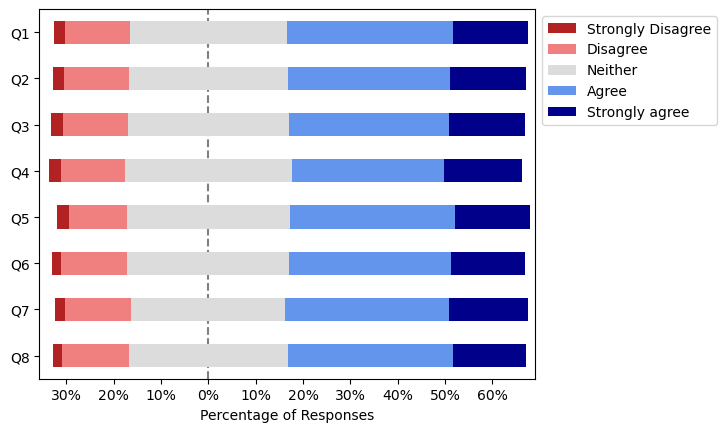

In [ ]:
#| label: fig-likert
#| fig-cap: A visualized Likert-scale result on all questions. 

# Better to visualize the data: 

import matplotlib.pyplot as plt
import plot_likert

fear_scales = range(1,6)
fear_scales_labels = ['Strongly Disagree', 'Disagree', 'Neither', 'Agree', 'Strongly agree']
fear_plot = plot_likert.plot_likert(fear_df, fear_scales, plot_percentage=True)
handles, labels = fear_plot.get_legend_handles_labels()
fear_plot.legend(handles, fear_scales_labels, bbox_to_anchor=(1.0, 1.0))
plt.show()

## Q1: Cronbach’s $\alpha$ for all items (except item 2)

**Answer**

For $Q_1 + Q_3 + ... + Q_7 + Q_8$, the $\alpha \approx 0.6873$. 

**Solution**



In [5]:
import pingouin as pg

fear_df_item2_excluded = fear_df.drop('Q2', axis=1)

# Calculate cronbach's alpha within a dataframe: 
def print_cronbach_alpha(df): 
    alpha = pg.cronbach_alpha(data=df)[0]
    print(f'Cronbach\'s Alpha:',alpha)

print_cronbach_alpha(fear_df_item2_excluded)
print('for the original Q2 deleted.')


Cronbach's Alpha: 0.6873382583349454
for the original Q2 deleted.


## Q2: Drop item to improve the scale

**Answer** 

I would like to drop Question 5, "People try to tell you that SPSS makes statistics easier to understand but it doesn't", for following reason: 

1. The lowest inter-item correlation: see @tbl-inter-item-corr, which was generated from SPSS (sorry about that). 
2. The lowest corrected item-total correlation: $0.2593$
3. Cronbach’s alpha increases when this item is deleted: from $\alpha \approx 0.6873$ to $\alpha \approx 0.6888$.[^2]


|    | Q1    | Q3   | Q4    |  Q5   |  Q6   |  Q7   |  Q8   |
|----|-------|------|-------|-------|-------|-------|-------|
| Q1 | 1.000 | .217 | .223  | .150  | .176  | .207  | .227  |
| Q3 | .217  | 1.000| .319  | .196  | .271  | .284  | .320  |
| Q4 | .223  | .319 | 1.000 | .187  | .240  | .341  | .371  |
| Q5 | .150  | .196 | .187  | 1.000 | .153  | .123  | .164  |
| Q6 | .176  | .271 | .240  | .153  | 1.000 | .232  | .264  |
| Q7 | .207  | .284 | .341  | .123  | .232  | 1.000 | .349  |
| Q8 | .227  | .320 | .371  | .164  | .264  | .349  | 1.000 |

:Inter-Item Correlation Matrix {#tbl-inter-item-corr}

[^2]: What a fortune number for we Asian people. 

**Solution**

In [6]:
# Calculate item-total correlations
def item_total_correlation(df):
    total_score = df.sum(axis=1)
    correlations = {}
    for question in df.columns:
        total_excluding_item = total_score - df[question]
        correlation = df[question].corr(total_excluding_item)
        correlations[question] = correlation
    return correlations

# Calculate the Cronbach's alpha after deleting each item
def cronbach_alpha_if_deleted(df):
    alphas = {}
    for question in df.columns:
        df_without_item = df.drop(question, axis=1)
        alpha = pg.cronbach_alpha(df_without_item)[0]
        alphas[question] = alpha
    return alphas

# Calculate item-total correlation
item_correlations = item_total_correlation(fear_df_item2_excluded)
print(f'Item-total Correlations:')
for item in item_correlations: 
    print(item, 'to total', item_correlations[item])
print(f'======================')
alphas_if_deleted = cronbach_alpha_if_deleted(fear_df_item2_excluded)
print(f'Cronbach\'s Alpha if an item deleted:')
for item in alphas_if_deleted: 
    print(f'If {item} is deleted: ', alphas_if_deleted[item])

# Present the result
print(f'======================')
best_item_to_delete_corr = min(item_correlations, key=item_correlations.get)
print(f'Item that has lowest item-total correlation coefficient: ', best_item_to_delete_corr)
best_item_to_delete_alpha = max(alphas_if_deleted, key=alphas_if_deleted.get)
print(f'Item that would improve Cronbach\'s alpha the most if deleted: {best_item_to_delete_alpha}')


Item-total Correlations:
Q1 to total 0.32493144386994777
Q3 to total 0.44890601739301994
Q4 to total 0.4726060003637261
Q5 to total 0.2592530237967403
Q6 to total 0.36566649644104937
Q7 to total 0.4267725068168662
Q8 to total 0.47718130451492624
Cronbach's Alpha if an item deleted:
If Q1 is deleted:  0.672004161791457
If Q3 is deleted:  0.6384165554243204
If Q4 is deleted:  0.6315956086496489
If Q5 is deleted:  0.6887820469122623
If Q6 is deleted:  0.6611984636617284
If Q7 is deleted:  0.6445525162609321
If Q8 is deleted:  0.6308404954800185
Item that has lowest item-total correlation coefficient:  Q5
Item that would improve Cronbach's alpha the most if deleted: Q5


## Q3: Recode, then describe the distribution of Q2

**Answer**

The distribution of the reverse-worded Question 2, after recoding, shows a mean score of $M = 2.52$, suggesting moderate agreement with standard deviations excites the participants. The standard deviation is $SD = 0.99$, indicates moderate variability among responses. The distribution, as shown in @fig-histo-q2rev, is slightly right-skewed, with a peak at $2$ (that is *Disagree*), indicating that a majority of students (also see in @fig-q2rev) reported that they disagree on the statement that standard deviations *excites* them.

**Solution**


In [7]:
# Recoding the reverse-worded item, this part works the same as SPSS: 
fear_df_rev = fear_df
fear_df_rev['Q2'] = 6 - fear_df_rev['Q2']

In [8]:
# Describe the 
fear_df_rev['Q2'].describe()

count    2571.000000
mean        2.518864
std         0.990585
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: Q2, dtype: float64

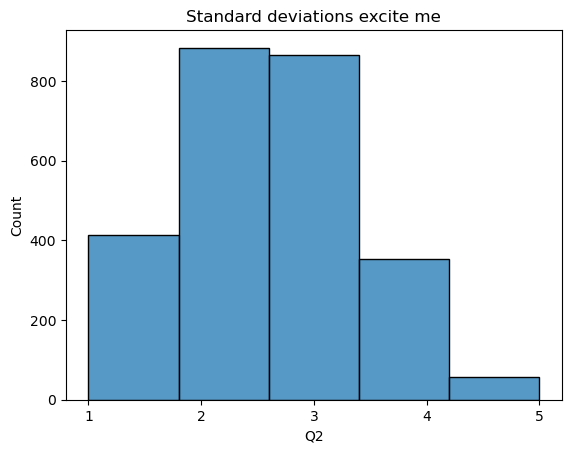

In [ ]:
#| label: fig-histo-q2rev
#| caption: A histogram based on result of Question 2 (recoded)

import seaborn as sns

q2_rev_hist = sns.histplot(fear_df_rev['Q2'], bins=5)
q2_rev_hist.set_xticks(fear_scales)
q2_rev_hist.set_title(fear_questions[1])
plt.show()

/home/rshen/miniconda3/envs/educ8009/lib/python3.10/site-packages/plot_likert/plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)
/home/rshen/miniconda3/envs/educ8009/lib/python3.10/site-packages/plot_likert/plot_likert.py:310: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  responses_to_first_question = responses_per_question[0]


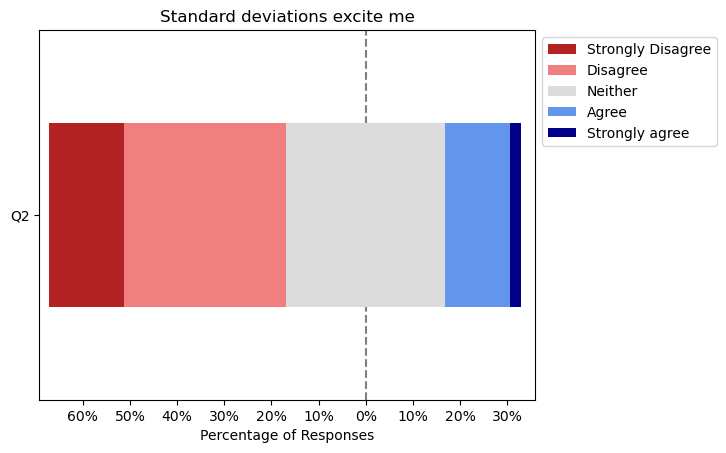

In [ ]:
#| label: fig-q2rev
#| fig-cap: The result of Question 2 (recoded)

q2_rev_plot = plot_likert.plot_likert(fear_df_rev['Q2'], fear_scales, plot_percentage=True)
q2_rev_plot.legend(handles, fear_scales_labels, bbox_to_anchor=(1.0, 1.0))
q2_rev_plot.set_title(fear_questions[1])
plt.show()

## Q4: Cronbach’s alpha of all the items

**Answer**

For $Q_1 + Q_{2rev} + ... + Q_7 + Q_8$, the Cronbach's $\alpha \approx 0.7071$

**Solution**

In [11]:
print_cronbach_alpha(fear_df_rev)
print('with recoded Q2_rev')

Cronbach's Alpha: 0.7071483372463728
with recoded Q2_rev
